# Configuración del entorno de trabajo

In [ ]:
# Importar librerías y módulos
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Diccionarios

In [ ]:
# Información del diccionario de datos
data_dict = {'Variable':['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label'],
             'Significado':['fecha y hora', 'aceleración hacia abajo (espalda)', 'aceleración hacia la izquierda (espalda)', 'aceleración hacia adelante (espalda)', 'aceleración hacia abajo (muslo)', 'aceleración hacia la derecha (muslo)', 'aceleración hacia atrás (muslo)', 'tipo de actividad'],
             'Tipo':['continua', 'continua', 'continua', 'continua', 'continua', 'continua', 'continua', 'categórica'],
             'Escala':['tiempo', 'g', 'g', 'g', 'g', 'g', 'g', '-'],
             'Ejemplo':['2021-03-24 14:42:04', '-0.999023', '-0.063477', '0.140625', '-0.980469', '-0.112061', '-0.048096', '6']}

# Almacenamiento como DataFrame
data_df = pd.DataFrame(data_dict)

# Imprimir diccionario de datos
print('Diccionario de datos')
data_df

Diccionario de datos


,Variable,Significado,Tipo,Escala,Ejemplo
0,timestamp,fecha y hora,continua,tiempo,2021-03-24 14:42:04
1,back_x,aceleración hacia abajo (espalda),continua,g,-0.999023
2,back_y,aceleración hacia la izquierda (espalda),continua,g,-0.063477
3,back_z,aceleración hacia adelante (espalda),continua,g,0.140625
4,thigh_x,aceleración hacia abajo (muslo),continua,g,-0.980469
5,thigh_y,aceleración hacia la derecha (muslo),continua,g,-0.112061
6,thigh_z,aceleración hacia atrás (muslo),continua,g,-0.048096
7,label,tipo de actividad,categórica,-,6


In [ ]:
# Información del diccionario de actividades
act_dict = {'Class':['1', '3', '4', '5', '6', '7', '8'],
             'Activity':['walking', 'shuffling', 'stairs (ascending)', 'bajando escaleras', 'parado', 'sentado', 'acostado']}

# Almacenamiento como DataFrame
act_df = pd.DataFrame(act_dict)

# Imprimir diccionario de actividades
print('Diccionario de actividades')
act_df

Diccionario de actividades


,Class,Activity
0,1,walking
1,3,shuffling
2,4,stairs (ascending)
3,5,stairs (descending)
4,6,standing
5,7,sitting
6,8,lying


# Carga de los datos

In [ ]:
# Lista para almacenar los DataFrames individuales
dfs = []

# Ruta a los archivos .csv
file_paths = glob.glob('/content/drive/MyDrive/Ciencia de datos e IA/archive/*.csv')

# Lectura de los .csv como DataFrames e incorporación a la lista
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenamiento de todos los DataFrames a uno solo
global_df = pd.concat(dfs, ignore_index=True)

# Descripción del DataFrame combinado
global_df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06
mean,-8.683814e-01,-3.178814e-02,2.244210e-02,-6.763959e-01,8.185066e-03,-3.858819e-01,3.940692e+00
std,2.756643e-01,1.556768e-01,4.279549e-01,5.596829e-01,2.707317e-01,5.087015e-01,2.912512e+00
min,-4.333252e+00,-2.031006e+00,-2.204834e+00,-7.942139e+00,-5.142578e+00,-7.593750e+00,1.000000e+00
25%,-9.909670e-01,-1.093750e-01,-2.692870e-01,-9.855960e-01,-1.132810e-01,-9.770510e-01,1.000000e+00
50%,-9.377440e-01,-1.855500e-02,-9.399400e-02,-9.357910e-01,-1.464800e-02,-1.906740e-01,3.000000e+00
75%,-8.344730e-01,5.761700e-02,3.078610e-01,-7.763700e-02,1.230470e-01,-3.174000e-03,7.000000e+00
max,3.630370e-01,1.576660e+00,1.179199e+00,3.395264e+00,5.725098e+00,3.953369e+00,8.000000e+00


# Limpieza de datos

In [ ]:
# Tipos de datos
global_df.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
dtype: object

In [ ]:
# Tamaño del dataset
print(global_df.shape)
print(type(global_df.shape))

(1832560, 8)
<class 'tuple'>


In [ ]:
# Split de los datos
df_train, df_test = train_test_split(global_df, test_size=0, stratify=global_df['label'])
# Stratify = La proporción de valores 'label' es la misma en el conjunto de prueba y entrenamiento

In [ ]:
# Valores nulos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466048 entries, 1329103 to 446942
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   timestamp  1466048 non-null  object 
 1   back_x     1466048 non-null  float64
 2   back_y     1466048 non-null  float64
 3   back_z     1466048 non-null  float64
 4   thigh_x    1466048 non-null  float64
 5   thigh_y    1466048 non-null  float64
 6   thigh_z    1466048 non-null  float64
 7   label      1466048 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 100.7+ MB


In [ ]:
# Valores duplicados
df_train[df_train.duplicated(keep=False)]

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label


# Visualización

<Axes: title={'center': 'Class Distribution'}, xlabel='label', ylabel='count'>

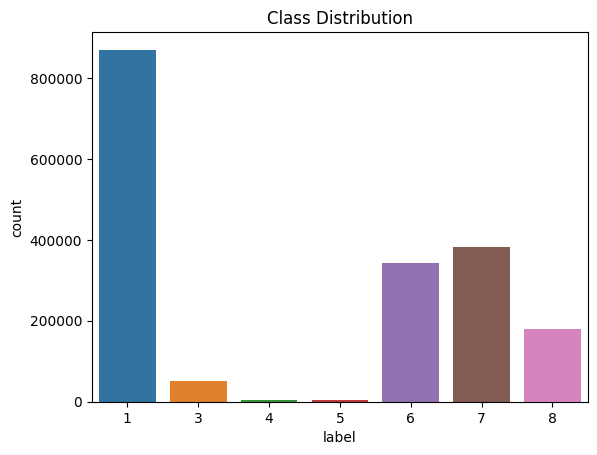

In [ ]:
# Histograma de actividades
plt.title('Distribución de registros por actividad')
sns.countplot(data=df_train, x='label')

In [ ]:
# Distribución de la variable categórica
df_train['label'].value_counts()

1    695752
7    305416
6    274558
8    143010
3     40713
5      3618
4      2981
Name: label, dtype: int64

<Axes: title={'center': 'Data Correlation'}>

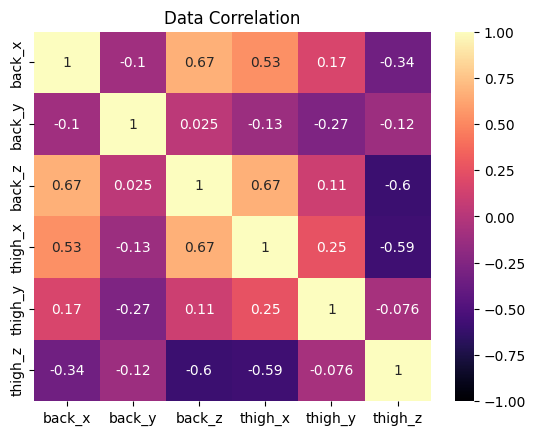

In [ ]:
# Análisis de correlación
plt.title('Análisis de correlación')
sns.heatmap(df_train.drop(['timestamp', 'label'], axis=1).corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

# Gráfica de pastel

In [ ]:
# Gráfica de pastel de actividades

# Distribución por actividad
label_count = global_df['label'].value_counts()

# Identificación de cada actividad por su valor
label_dict = {1:'walking', 3:'shuffling', 4:'stairs (ascending)', 5:'stairs (descending)', 6:'standing', 7:'sitting', 8:'lying'}
label_count.index = label_count.index.map(label_dict)

# Creación de una gráfica de pastel
trace = go.Pie(labels=label_count.index, values=label_count.values)

# Creación de un diseño
layout = go.Layout(title='Densidad de registros por actividad')

# Creación de una figura (ligar gráfica y diseño)
fig = go.Figure(data=[trace], layout=layout)

# Muestra de la figura
fig.show()

# Gráficos de dispersión

In [ ]:
# División de registros por actividad
walking_df = global_df.loc[global_df['label'] == 1]
shuffling_df = global_df.loc[global_df['label'] == 3]
stairs_asc_df = global_df.loc[global_df['label'] == 4]
stairs_des_df = global_df.loc[global_df['label'] == 5]
standing_df = global_df.loc[global_df['label'] == 6]
sitting_df = global_df.loc[global_df['label'] == 7]
lying_df = global_df.loc[global_df['label'] == 8]

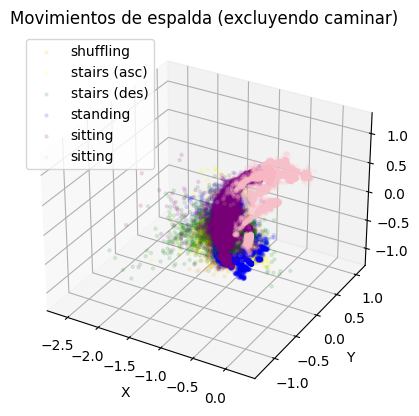

In [ ]:
# Gráfico de dispersión para movimientos de espalda (excluyendo caminar)

# Creación de figura y gráfico
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Incorporación de datos
ax.scatter(shuffling_df.back_x, shuffling_df.back_y, shuffling_df.back_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_asc_df.back_x, stairs_asc_df.back_y, stairs_asc_df.back_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_des_df.back_x, stairs_des_df.back_y, stairs_des_df.back_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.back_x, standing_df.back_y, standing_df.back_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.back_x, sitting_df.back_y, sitting_df.back_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.back_x, lying_df.back_y, lying_df.back_z, color='pink', label='sitting', alpha=0.1, marker='.')

# Incorporación del título, etiquetas y leyenda
plt.title('Movimientos de espalda (excluyendo caminar)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()

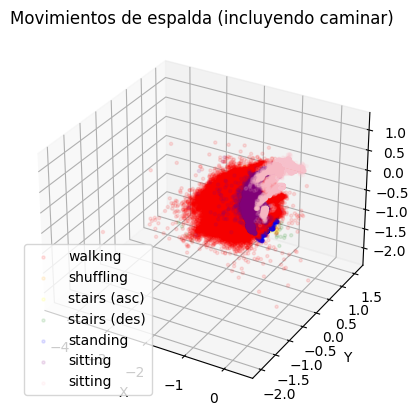

In [ ]:
# Gráfico de dispersión para movimientos de espalda (incluyendo caminar)

# Creación de figura y gráfico
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Incorporación de datos
ax.scatter(walking_df.back_x, walking_df.back_y, walking_df.back_z, color='red', label='walking', alpha=0.1, marker='.')
ax.scatter(shuffling_df.back_x, shuffling_df.back_y, shuffling_df.back_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_asc_df.back_x, stairs_asc_df.back_y, stairs_asc_df.back_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_des_df.back_x, stairs_des_df.back_y, stairs_des_df.back_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.back_x, standing_df.back_y, standing_df.back_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.back_x, sitting_df.back_y, sitting_df.back_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.back_x, lying_df.back_y, lying_df.back_z, color='pink', label='sitting', alpha=0.1, marker='.')

# Incorporación del título, etiquetas y leyenda
plt.title('Movimientos de espalda (incluyendo caminar)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()

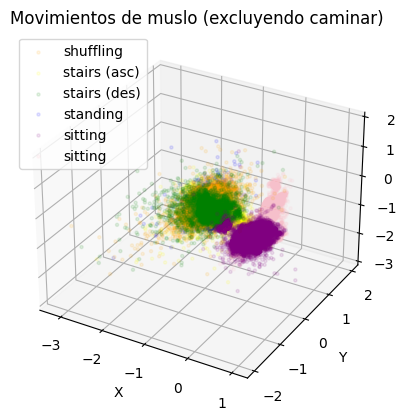

In [ ]:
# Gráfico de dispersión para movimientos de muslo (excluyendo caminar)

# Creación de figura y gráfico
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Incorporación de datos
ax.scatter(shuffling_df.thigh_x, shuffling_df.thigh_y, shuffling_df.thigh_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_asc_df.thigh_x, stairs_asc_df.thigh_y, stairs_asc_df.thigh_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_des_df.thigh_x, stairs_des_df.thigh_y, stairs_des_df.thigh_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.thigh_x, standing_df.thigh_y, standing_df.thigh_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.thigh_x, sitting_df.thigh_y, sitting_df.thigh_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.thigh_x, lying_df.thigh_y, lying_df.thigh_z, color='pink', label='sitting', alpha=0.1, marker='.')

# Incorporación del título, etiquetas y leyenda
plt.title('Movimientos de muslo (excluyendo caminar)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



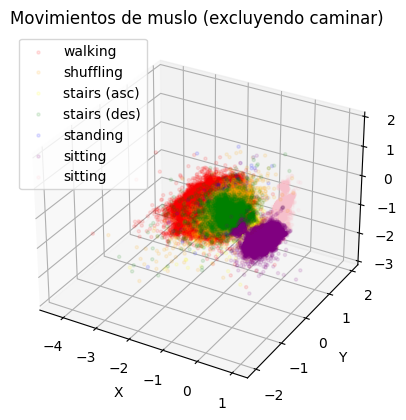

In [ ]:
# Gráfico de dispersión para movimientos de muslo (incluyendo caminar)

# Creación de figura y gráfico
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Incorporación de datos
ax.scatter(walking_df.back_x, walking_df.back_y, walking_df.back_z, color='red', label='walking', alpha=0.1, marker='.')
ax.scatter(shuffling_df.thigh_x, shuffling_df.thigh_y, shuffling_df.thigh_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_asc_df.thigh_x, stairs_asc_df.thigh_y, stairs_asc_df.thigh_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_des_df.thigh_x, stairs_des_df.thigh_y, stairs_des_df.thigh_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.thigh_x, standing_df.thigh_y, standing_df.thigh_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.thigh_x, sitting_df.thigh_y, sitting_df.thigh_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.thigh_x, lying_df.thigh_y, lying_df.thigh_z, color='pink', label='sitting', alpha=0.1, marker='.')

# Incorporación del título, etiquetas y leyenda
plt.title('Movimientos de muslo (excluyendo caminar)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()